# 使用技术指标来识别市场结构

能够识别市场结构（划分趋势和震荡）的关键技术指标：

- Market Meanness Index (MMI)
- Fractal Dimension

## Market Meanness Index (MMI)

MMI是一个用于衡量市场处于趋势还是震荡的技术指标，它的取值范围是0-100。当MMI处于下降趋势，认为市场处于趋势状态，相反当MMI处于上升状态，认为市场处于震荡状态。

In [16]:
import pandas as pd
import numpy as np


def calculate_mmi(data: pd.Series, period: int) -> pd.Series:
    """
    Calculate the Market Meanness Index (MMI) for asset prices.

    Args:
        data (pd.Series): The price series.
        period (int): The lookback period of the indicator, must be greater than 1.

    Returns:
        pd.Series: The Market Meanness Index (MMI) values.
    """
    # 参数验证
    if not isinstance(data, pd.Series):
        raise TypeError("data must be a pandas Series")
    if not isinstance(period, int):
        raise TypeError("period must be an integer")
    if period < 2:
        raise ValueError("period must be greater than 1")
    if len(data) < period:
        raise ValueError("data length must be >= period")

    def _mmi(data: np.ndarray) -> float:
        # 反转数据，索引0表示最新数据
        series = data[::-1]

        # 计算中位数
        median = np.median(series)

        nh = nl = 0
        for i in range(1, len(series)):
            if series[i] > median and series[i] > series[i - 1]:
                nl += 1
            elif series[i] < median and series[i] < series[i - 1]:
                nh += 1

        # 计算MMI
        return 100.0 * (nl + nh) / (len(series) - 1)

    return data.rolling(window=period, min_periods=period).apply(_mmi, raw=True)

In [17]:
file_path = "../data/yahoo/Bitcoin.csv"
df = pd.read_csv(file_path, parse_dates=True, index_col=0)
df.round(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,21056800
2014-09-18,456.86,456.86,413.10,424.44,424.44,34483200
2014-09-19,424.10,427.83,384.53,394.80,394.80,37919700
2014-09-20,394.67,423.30,389.88,408.90,408.90,36863600
2014-09-21,408.08,412.43,393.18,398.82,398.82,26580100
...,...,...,...,...,...,...
2024-12-13,100046.65,101888.80,99233.28,101459.26,101459.26,56894751583
2024-12-14,101451.44,102618.88,100634.05,101372.97,101372.97,40422968793
2024-12-15,101373.53,105047.54,101227.03,104298.70,104298.70,51145914137


In [18]:
mmi = calculate_mmi(df["Close"], 200)

<Axes: title={'center': 'Bitcoin Market Meanness Index (MMI)'}, xlabel='Date'>

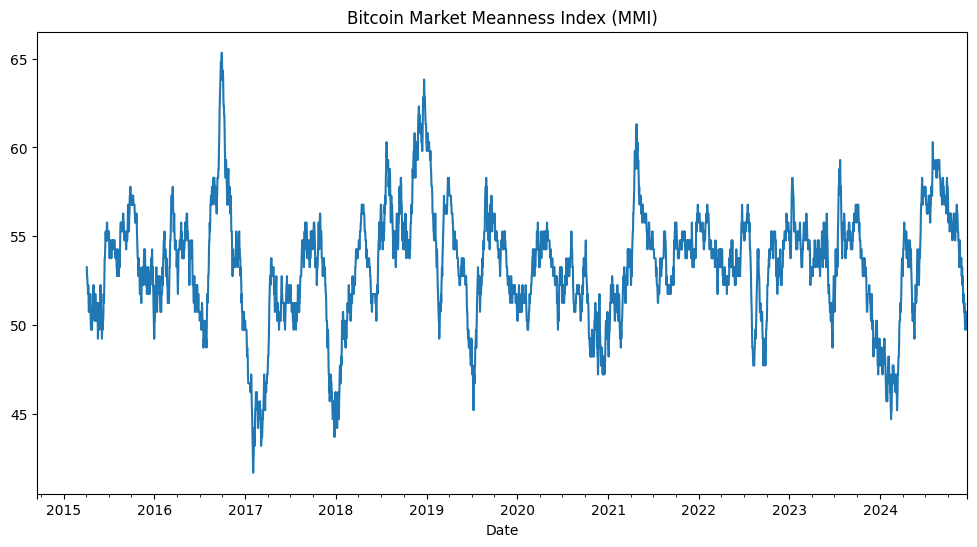

In [20]:
mmi.plot(title="Bitcoin Market Meanness Index (MMI)", figsize=(12, 6))